In [1]:
import pandas as pd
import numpy as np
import time as t
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
dataframe_project = pd.read_csv(r'D:\College Education\Semester 5\19CSE305 Machine Learning\Project\Coding\patches_gabor_15816_1.csv')
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,good
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,good
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,good
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,good
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,bad
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,bad
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,bad
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,bad


In [3]:
dataframe_project.isna().sum()

ImageName                             0
LocalEnergy_0_1                       0
LocalEnergy_0_2                       0
LocalEnergy_0_3                       0
LocalEnergy_0.7853981633974483_1      0
LocalEnergy_0.7853981633974483_2      0
LocalEnergy_0.7853981633974483_3      0
LocalEnergy_1.5707963267948966_1      0
LocalEnergy_1.5707963267948966_2      0
LocalEnergy_1.5707963267948966_3      0
LocalEnergy_2.356194490192345_1       0
LocalEnergy_2.356194490192345_2       0
LocalEnergy_2.356194490192345_3       0
MeanAmplitude_0_1                     0
MeanAmplitude_0_2                     0
MeanAmplitude_0_3                     0
MeanAmplitude_0.7853981633974483_1    0
MeanAmplitude_0.7853981633974483_2    0
MeanAmplitude_0.7853981633974483_3    0
MeanAmplitude_1.5707963267948966_1    0
MeanAmplitude_1.5707963267948966_2    0
MeanAmplitude_1.5707963267948966_3    0
MeanAmplitude_2.356194490192345_1     0
MeanAmplitude_2.356194490192345_2     0
MeanAmplitude_2.356194490192345_3     0


In [4]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
dataframe_project['class'] = label_encoder.fit_transform(dataframe_project['class'])
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,1
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,1
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,1
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,1
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,0
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,0
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,0
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,0


In [5]:
normal_scaler = prep.StandardScaler()
scaled_columns = dataframe_project.columns[1:25]
scaled_df = dataframe_project
for col in scaled_columns:
    scaled_df[col] = normal_scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))
scaled_df

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,0.666561,-0.787215,0.215413,1.248537,0.990115,...,1.077631,1.082246,0.726466,0.556098,1.807526,1.081326,1.075729,1.077680,0.730857,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,0.497735,-0.743263,0.810270,1.219416,0.800269,...,1.286252,1.289359,0.676086,0.527098,1.847232,1.289622,1.285047,1.286934,0.680215,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,0.458921,-0.862340,-0.065256,1.081344,1.084022,...,1.254597,1.256790,0.773855,0.580019,1.896600,1.258796,1.253507,1.254317,0.777327,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,0.532372,-0.657909,0.232855,2.600439,0.980256,...,1.025223,1.032650,0.672973,0.570229,4.112539,1.039405,1.022403,1.026616,0.679669,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,0.685009,-0.873417,-0.272901,0.318206,1.069484,...,1.118821,1.120545,0.797933,0.597516,0.650323,1.120221,1.117981,1.118603,0.799854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,0.674025,-0.269214,-0.155585,0.040035,0.484496,...,0.630777,0.629839,0.708355,0.581279,-0.093301,0.630111,0.630928,0.630116,0.707160,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,0.715647,-0.494143,-0.535561,0.619319,0.931666,...,0.912462,0.913728,0.725457,0.611745,0.463753,0.913006,0.912409,0.912989,0.729585,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,0.620126,-0.538403,1.330936,0.260876,0.947406,...,0.813567,0.814113,0.591175,0.452550,0.002397,0.811487,0.813599,0.813718,0.593426,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,0.639883,-0.033262,-0.050772,1.227483,0.550753,...,0.564815,0.566770,0.637962,0.600673,1.057681,0.567096,0.565145,0.567660,0.637707,0


In [6]:
input_project = scaled_df.loc[:, scaled_df.columns[1:25]]
output_project = scaled_df.loc[:, scaled_df.columns[25]]

input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=42)

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(input_train, output_train.ravel())

In [8]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colName=corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr
col=correlation(input_train_res, 0.95)
print('Correlated columns:',col)
print(len(col))

Correlated columns: {'LocalEnergy_1.5707963267948966_3', 'LocalEnergy_0.7853981633974483_2', 'LocalEnergy_0.7853981633974483_1', 'MeanAmplitude_0.7853981633974483_3', 'MeanAmplitude_0_1', 'MeanAmplitude_1.5707963267948966_3', 'LocalEnergy_2.356194490192345_1', 'LocalEnergy_1.5707963267948966_1', 'MeanAmplitude_2.356194490192345_2', 'LocalEnergy_2.356194490192345_3', 'MeanAmplitude_1.5707963267948966_1', 'MeanAmplitude_2.356194490192345_3', 'MeanAmplitude_0_2', 'MeanAmplitude_1.5707963267948966_2', 'MeanAmplitude_0_3', 'MeanAmplitude_0.7853981633974483_1', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_2.356194490192345_2', 'MeanAmplitude_2.356194490192345_1'}
19


In [9]:
dataframe_reduced = scaled_df.drop(columns = ['LocalEnergy_1.5707963267948966_1', 'MeanAmplitude_0_3', 'MeanAmplitude_2.356194490192345_3', 'LocalEnergy_0.7853981633974483_2', 'LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_0.7853981633974483_3', 'MeanAmplitude_0_1', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_1.5707963267948966_3', 'MeanAmplitude_1.5707963267948966_2', 'MeanAmplitude_1.5707963267948966_1', 'MeanAmplitude_2.356194490192345_2', 'MeanAmplitude_0_2', 'MeanAmplitude_2.356194490192345_1', 'LocalEnergy_2.356194490192345_2', 'LocalEnergy_2.356194490192345_3', 'MeanAmplitude_0.7853981633974483_1'])
dataframe_reduced

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_2,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,-0.787215,1.248537,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,-0.743263,1.219416,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,-0.862340,1.081344,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,-0.657909,2.600439,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,-0.873417,0.318206,1
...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,-0.269214,0.040035,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,-0.494143,0.619319,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,-0.538403,0.260876,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,-0.033262,1.227483,0


In [10]:
dataframe_scaled_input = dataframe_reduced.iloc[:, 1:7]
dataframe_scaled_output = dataframe_reduced.iloc[:, 7]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())
print(output_train_res)

[0 1 0 ... 2 2 2]


<Axes: >

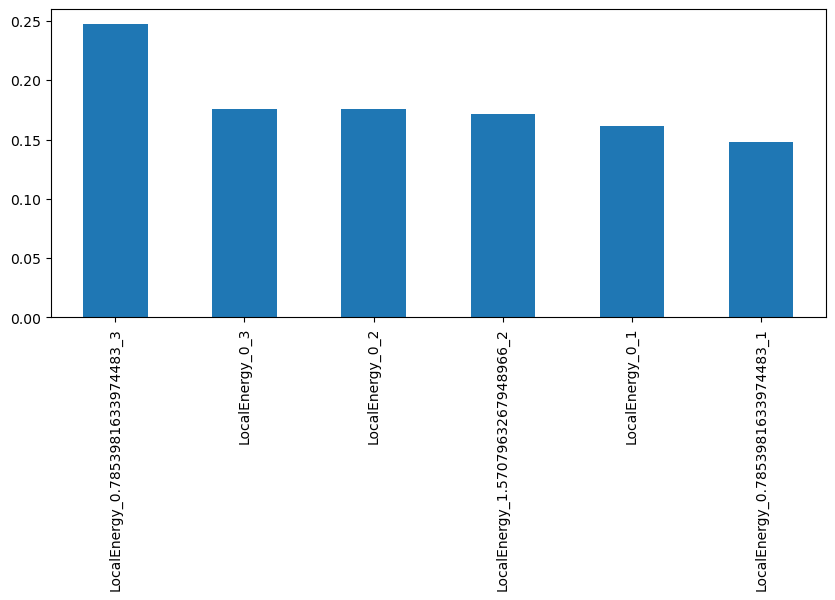

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

mi1 = mutual_info_classif(input_train_res, output_train_res)
mi1 = pd.Series(mi1)
mi1.index = input_train_res.columns
mi1.sort_values(ascending=False)
mi1.sort_values(ascending=False).plot.bar(figsize=(10, 4))
mi1_sorted = mi1.sort_values(ascending=False)

# Plot the sorted values only if the value is greater than 0
mi1_sorted[mi1_sorted > 0].plot.bar(figsize=(10, 4))

In [13]:
dataframe_final = dataframe_reduced.drop(columns=['LocalEnergy_0.7853981633974483_1'])
dataframe_final

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_2,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,-0.787215,1.248537,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,-0.743263,1.219416,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,-0.862340,1.081344,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,-0.657909,2.600439,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,-0.873417,0.318206,1
...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,-0.269214,0.040035,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,-0.494143,0.619319,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,-0.538403,0.260876,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,-0.033262,1.227483,0


In [14]:
input_final = dataframe_final.iloc[:, 1:6]
output_final = dataframe_final.iloc[:, 6]
input_train, input_test, output_train, output_test = train_test_split(input_final, output_final, test_size=0.3, random_state=42)

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(input_train, output_train.ravel())

In [16]:
# Project data classification rules
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

knn_model = KNeighborsClassifier()
k_range = list(range(2, 13))
param_grid = dict(n_neighbors=k_range)

scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10)
precision_scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10, scoring='precision_macro')
recall_scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10, scoring='recall_macro')
f1_scores_knn = cross_val_score(knn_model, input_train_res.values, output_train_res, cv = 10, scoring='f1_macro')

start_train_knn = t.time()
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_knn.fit(input_train_res, output_train_res)
end_train_knn = t.time()
training_time_knn = end_train_knn - start_train_knn
predicted_knn_train = grid_search_knn.predict(input_train_res.values)

start_test_knn = t.time()
predicted_knn_test = grid_search_knn.predict(input_test.values)
end_test_knn = t.time()
testing_time_knn = end_test_knn - start_test_knn

Fitting 5 folds for each of 11 candidates, totalling 55 fits


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [17]:
print("Training data")
print(classification_report(output_train_res, predicted_knn_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_knn_train))
print("Precision: ", precision_score(output_train_res, predicted_knn_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_knn_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_knn_train, average='weighted'))
print(training_time_knn, 's')
print("Testing data")
print(classification_report(output_test, predicted_knn_test))
print("Accuracy: ", accuracy_score(output_test, predicted_knn_test))
print("Precision: ", precision_score(output_test, predicted_knn_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_knn_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_knn_test, average='weighted'))
print(testing_time_knn, 's')
print(grid_search_knn.best_params_)

print("Mean Accuracy: ", scores_knn.mean())
print('Mean Precision: ', precision_scores_knn.mean())
print('Mean Recall: ', recall_scores_knn.mean())
print('Mean F1-score: ', f1_scores_knn.mean())
print("Standard Deviation: ",scores_knn.std())

Training data
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1442
           1       0.93      0.83      0.88      1442
           2       0.87      0.96      0.91      1442

    accuracy                           0.90      4326
   macro avg       0.90      0.90      0.90      4326
weighted avg       0.90      0.90      0.90      4326

Accuracy:  0.8971336107258437
Precision:  0.8991634294807207
Recall:  0.8971336107258437
F1-score:  0.8965577997221877
2.305978536605835 s
Testing data
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       449
           1       0.80      0.72      0.76       621
           2       0.46      0.55      0.50       223

    accuracy                           0.70      1293
   macro avg       0.66      0.67      0.66      1293
weighted avg       0.71      0.70      0.70      1293

Accuracy:  0.699922660479505
Precision:  0.7126923469710089
Recall:  0.6

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from itertools import product

log_regre_model = LogisticRegressionCV()

scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv=10)
precision_scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv = 10, scoring='precision_macro')
recall_scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv = 10, scoring='recall_macro')
f1_scores_logreg = cross_val_score(log_regre_model, input_train_res.values, output_train_res, cv = 10, scoring='f1_macro')
start_train_log_regre = t.time()
grid_search_log_regre = GridSearchCV(log_regre_model, param_grid={
'solver': ['lbfs', 'liblinear', 'sag', 'saga']
}, cv=5)
grid_search_log_regre.fit(input_train_res, output_train_res)
end_train_log_regre = t.time()
training_time_log_regre = end_train_log_regre - start_train_log_regre
predicted_log_regre_train = grid_search_log_regre.predict(input_train_res.values)
start_test_log_regre = t.time()
predicted_log_regre_test = grid_search_log_regre.predict(input_test.values)
end_test_log_regre = t.time()
testing_time_log_regre = end_test_log_regre - start_test_log_regre

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LENOVO\anaconda3\Lib\site-packag

In [19]:
print("Training data")
print(classification_report(output_train_res, predicted_log_regre_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_log_regre_train))
print("Precision: ", precision_score(output_train_res, predicted_log_regre_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_log_regre_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_log_regre_train, average='weighted'))
print(training_time_log_regre, 's')
print("Testing data")
print(classification_report(output_test, predicted_log_regre_test))
print("Accuracy: ", accuracy_score(output_test, predicted_log_regre_test))
print("Precision: ", precision_score(output_test, predicted_log_regre_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_log_regre_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_log_regre_test, average='weighted'))
print(testing_time_log_regre, 's')
print(grid_search_log_regre.best_params_)
print("Mean Accuracy: ", scores_logreg.mean())
print('Mean Precision: ', precision_scores_logreg.mean())
print('Mean Recall: ', recall_scores_logreg.mean().mean())
print('Mean F1-score: ', f1_scores_logreg.mean())
print("Standard Deviation: ",scores_logreg.std())

Training data
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1442
           1       0.49      0.67      0.56      1442
           2       0.47      0.24      0.31      1442

    accuracy                           0.51      4326
   macro avg       0.50      0.51      0.48      4326
weighted avg       0.50      0.51      0.48      4326

Accuracy:  0.505085529357374
Precision:  0.49986817930813005
Recall:  0.505085529357374
F1-score:  0.4840939261883641
8.077556371688843 s
Testing data
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       449
           1       0.67      0.68      0.68       621
           2       0.28      0.24      0.26       223

    accuracy                           0.60      1293
   macro avg       0.52      0.53      0.52      1293
weighted avg       0.59      0.60      0.59      1293

Accuracy:  0.5955143078112916
Precision:  0.5879283742080834
Recall:  0.5

In [20]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv=10)
precision_scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv = 10, scoring='precision_macro')
recall_scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv = 10, scoring='recall_macro')
f1_scores_mlp = cross_val_score(mlp_model, input_train_res.values, output_train_res, cv = 10, scoring='f1_macro')
start_train_mlp = t.time()
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid={
'learning_rate': ["constant"],
'hidden_layer_sizes': [(100,3)],
'alpha': [0.8],
'solver': ['lbfgs', 'sgd', 'adam'],
'activation': ['identity', 'logistic', 'tanh', 'relu']
}, cv=5)
grid_search_mlp.fit(input_train_res, output_train_res)
end_train_mlp = t.time()
training_time_mlp = end_train_mlp - start_train_mlp
predicted_mlp_train = grid_search_mlp.predict(input_train_res.values)

start_test_mlp = t.time()
predicted_mlp_test = grid_search_mlp.predict(input_test.values)
end_test_mlp = t.time()
testing_time_mlp = end_test_mlp - start_test_mlp

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

In [21]:
print("Training data")
print(classification_report(output_train_res, predicted_mlp_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_mlp_train))
print("Precision: ", precision_score(output_train_res, predicted_mlp_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_mlp_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_mlp_train, average='weighted'))
print(training_time_mlp, 's')
print("Testing data")
print(classification_report(output_test, predicted_mlp_test))
print("Accuracy: ", accuracy_score(output_test, predicted_mlp_test))
print("Precision: ", precision_score(output_test, predicted_mlp_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_mlp_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_mlp_test, average='weighted'))
print(testing_time_mlp, 's')
print(grid_search_mlp.best_params_)
print("Mean Accuracy: ", scores_mlp.mean())
print('Mean Precision: ', precision_scores_mlp.mean())
print('Mean Recall', recall_scores_mlp.mean())
print('Mean F1-score', f1_scores_mlp.mean())
print("Standard Deviation: ",scores_mlp.std())

Training data
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1442
           1       0.65      0.82      0.72      1442
           2       0.68      0.48      0.56      1442

    accuracy                           0.69      4326
   macro avg       0.69      0.69      0.68      4326
weighted avg       0.69      0.69      0.68      4326

Accuracy:  0.6856218215441516
Precision:  0.6885194799249872
Recall:  0.6856218215441516
F1-score:  0.6778665441846591
199.81656694412231 s
Testing data
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       449
           1       0.79      0.84      0.81       621
           2       0.51      0.45      0.48       223

    accuracy                           0.74      1293
   macro avg       0.69      0.68      0.69      1293
weighted avg       0.74      0.74      0.74      1293

Accuracy:  0.7440061871616396
Precision:  0.7383024013482673
Recall:  0

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

scores_dt = cross_val_score(dt_model, input_train_res.values, output_train_res, cv=10)
precision_scores_dt = cross_val_score(dt_model, input_train_res.values, output_train_res, cv=10, scoring='precision_macro')
recall_scores_dt = cross_val_score(dt_model, input_train_res.values, output_train_res, cv=10, scoring='recall_macro')
f1_scores_dt = cross_val_score(dt_model, input_train_res.values, output_train_res, cv=10, scoring='f1_macro')

start_train_dt = t.time()
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={
    'max_depth': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}, cv=5)
grid_search_dt.fit(input_train_res, output_train_res)
end_train_dt = t.time()
training_time_dt = end_train_dt - start_train_dt

predicted_dt_train = grid_search_dt.predict(input_train_res.values)
start_test_dt = t.time()
predicted_dt_test = grid_search_dt.predict(input_test.values)
end_test_dt = t.time()
testing_time_dt = end_test_dt - start_test_dt

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
print("Training data")
print(classification_report(output_train_res, predicted_dt_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_dt_train))
print("Precision: ", precision_score(output_train_res, predicted_dt_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_dt_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_dt_train, average='weighted'))
print(training_time_dt, 's')
print("Testing data")
print(classification_report(output_test, predicted_dt_test))
print("Accuracy: ", accuracy_score(output_test, predicted_dt_test))
print("Precision: ", precision_score(output_test, predicted_dt_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_dt_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_dt_test, average='weighted'))
print(testing_time_dt, 's')
print(grid_search_dt.best_params_)
print("Mean Accuracy: ", scores_dt.mean())
print('Mean Precsion: ', precision_scores_dt.mean())
print('Mean Recall: ', recall_scores_dt.mean())
print('Mean F1-score: ', f1_scores_dt.mean())
print("Standard Deviation: ",scores_dt.std())

Training data
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1442
           1       0.64      0.64      0.64      1442
           2       0.66      0.57      0.62      1442

    accuracy                           0.65      4326
   macro avg       0.65      0.65      0.65      4326
weighted avg       0.65      0.65      0.65      4326

Accuracy:  0.6511789181692095
Precision:  0.6515821273476813
Recall:  0.6511789181692095
F1-score:  0.6493063669942046
10.599100828170776 s
Testing data
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       449
           1       0.78      0.61      0.68       621
           2       0.40      0.51      0.45       223

    accuracy                           0.65      1293
   macro avg       0.62      0.64      0.62      1293
weighted avg       0.68      0.65      0.66      1293

Accuracy:  0.654292343387471
Precision:  0.6785601245555567
Recall:  0.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

accuracy_scores_rf = cross_val_score(rf_model, input_train_res.values, output_train_res, cv=10)
precision_scores_rf = cross_val_score(rf_model, input_train_res.values, output_train_res, cv=10, scoring='precision_macro')
recall_scores_rf = cross_val_score(rf_model, input_train_res.values, output_train_res, cv=10, scoring='recall_macro')
f1_scores_rf = cross_val_score(rf_model, input_train_res.values, output_train_res, cv=10, scoring='f1_macro')

start_train_rf = t.time()
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid={
    'n_estimators': [10, 20, 30, 50, 100]
}, cv=5)
grid_search_rf.fit(input_train_res, output_train_res)
end_train_rf = t.time()
training_time_rf = end_train_rf - start_train_rf

predicted_rf_train = grid_search_rf.predict(input_train_res.values)
start_test_rf = t.time()
predicted_rf_test = grid_search_rf.predict(input_test.values)
end_test_rf = t.time()
testing_time_rf = end_test_rf - start_test_rf

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
print("Training data")
print(classification_report(output_train_res, predicted_rf_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_rf_train))
print("Precision: ", precision_score(output_train_res, predicted_rf_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_rf_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_rf_train, average='weighted'))
print(training_time_rf, 's')
print("Testing data")
print(classification_report(output_test, predicted_rf_test))
print("Accuracy: ", accuracy_score(output_test, predicted_rf_test))
print("Precision: ", precision_score(output_test, predicted_rf_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_rf_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_rf_test, average='weighted'))
print(testing_time_rf, 's')
print(grid_search_rf.best_params_)
print('Mean accuracy: ', accuracy_scores_rf.mean())
print('Mean Precsion: ', precision_scores_rf.mean())
print('Mean Recall: ', recall_scores_rf.mean())
print('Mean F1-score: ', f1_scores_rf.mean())
print('Standard deviation: ',accuracy_scores_rf.std())

Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442
           1       1.00      1.00      1.00      1442
           2       1.00      1.00      1.00      1442

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
24.28764057159424 s
Testing data
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       449
           1       0.78      0.83      0.80       621
           2       0.54      0.49      0.51       223

    accuracy                           0.74      1293
   macro avg       0.70      0.69      0.69      1293
weighted avg       0.74      0.74      0.74      1293

Accuracy:  0.7424593967517401
Precision:  0.7388067936929251
Recall:  0.7424593967517401
F1-score:  0.7397810156599364
0.03827905654

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

accuracy_scores_nb = cross_val_score(nb_model, input_train_res.values, output_train_res, cv=10)
precision_scores_nb = cross_val_score(nb_model, input_train_res.values, output_train_res, cv=10, scoring='precision_macro')
recall_scores_nb = cross_val_score(nb_model, input_train_res.values, output_train_res, cv=10, scoring='recall_macro')
f1_scores_nb = cross_val_score(nb_model, input_train_res.values, output_train_res, cv=10, scoring='f1_macro')

start_train_nb = t.time()
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid={
    'var_smoothing': [2, 5, 10, 15]
}, cv=5)
grid_search_nb.fit(input_train_res, output_train_res)
end_train_nb = t.time()
training_time_nb = end_train_nb - start_train_nb

predicted_nb_train = grid_search_nb.predict(input_train_res.values)
start_test_nb = t.time()
predicted_nb_test = grid_search_nb.predict(input_test.values)
end_test_nb = t.time()
testing_time_nb = end_test_nb - start_test_nb

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [27]:
print("Training data")
print(classification_report(output_train_res, predicted_nb_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_nb_train))
print("Precision: ", precision_score(output_train_res, predicted_nb_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_nb_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_nb_train, average='weighted'))
print(training_time_nb, 's')
print("Testing data")
print(classification_report(output_test, predicted_nb_test))
print("Accuracy: ", accuracy_score(output_test, predicted_nb_test))
print("Precision: ", precision_score(output_test, predicted_nb_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_nb_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_nb_test, average='weighted'))
print(testing_time_nb, 's')
print(grid_search_nb.best_params_)
print("Mean Accuracy: ", accuracy_scores_nb.mean())
print('Mean Precsion: ', precision_scores_nb.mean())
print('Mean Recall: ', recall_scores_nb.mean())
print('Mean F1-score: ', f1_scores_nb.mean())
print("Standard Deviation: ", accuracy_scores_nb.std())

Training data
              precision    recall  f1-score   support

           0       0.58      0.48      0.53      1442
           1       0.45      0.97      0.61      1442
           2       0.00      0.00      0.00      1442

    accuracy                           0.48      4326
   macro avg       0.34      0.48      0.38      4326
weighted avg       0.34      0.48      0.38      4326

Accuracy:  0.48381877022653724
Precision:  0.34341777991735867
Recall:  0.48381877022653724
F1-score:  0.3796058159422329
0.12717437744140625 s
Testing data
              precision    recall  f1-score   support

           0       0.73      0.56      0.63       449
           1       0.63      0.97      0.76       621
           2       0.00      0.00      0.00       223

    accuracy                           0.66      1293
   macro avg       0.45      0.51      0.47      1293
weighted avg       0.56      0.66      0.59      1293

Accuracy:  0.6581593194122196
Precision:  0.5573607721345338
Recall

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\

In [28]:
from sklearn.svm import SVC

svm_model = SVC()

accuracy_scores_svm = cross_val_score(svm_model, input_train_res.values, output_train_res, cv=10)
precision_scores_svm = cross_val_score(svm_model, input_train_res.values, output_train_res, cv=10, scoring='precision_macro')
recall_scores_svm = cross_val_score(svm_model, input_train_res.values, output_train_res, cv=10, scoring='recall_macro')
f1_scores_svm = cross_val_score(svm_model, input_train_res.values, output_train_res, cv=10, scoring='f1_macro')

start_train_svm = t.time()
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid={
    'C': [1, 10, 20, 30],
    'kernel': ['rbf', 'poly', 'linear']
}, cv=5)
grid_search_svm.fit(input_train_res, output_train_res)
end_train_svm = t.time()
training_time_svm = end_train_svm - start_train_svm

predicted_svm_train = grid_search_svm.predict(input_train_res.values)
start_test_svm = t.time()
predicted_svm_test = grid_search_svm.predict(input_test.values)
end_test_svm = t.time()
testing_time_svm = end_test_svm - start_test_svm

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
print("Training data")
print(classification_report(output_train_res, predicted_svm_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_svm_train))
print("Precision: ", precision_score(output_train_res, predicted_svm_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_svm_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_svm_train, average='weighted'))
print(training_time_svm, 's')
print("Testing data")
print(classification_report(output_test, predicted_svm_test))
print("Accuracy: ", accuracy_score(output_test, predicted_svm_test))
print("Precision: ", precision_score(output_test, predicted_svm_test, average='weighted'))
print("Recall: ", recall_score(output_test, predicted_svm_test, average='weighted'))
print("F1-score: ", f1_score(output_test, predicted_svm_test, average='weighted'))
print(testing_time_svm, 's')
print(grid_search_svm.best_params_)
print('Mean accuracy: ', accuracy_scores_svm.mean())
print('Mean Precsion: ', precision_scores_svm.mean())
print('Mean Recall: ', recall_scores_svm.mean())
print('Mean F1-score: ', f1_scores_svm.mean())
print('Standard deviation: ', accuracy_scores_svm.std())

Training data
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1442
           1       0.71      0.82      0.76      1442
           2       0.78      0.65      0.71      1442

    accuracy                           0.75      4326
   macro avg       0.76      0.75      0.75      4326
weighted avg       0.76      0.75      0.75      4326

Accuracy:  0.7524271844660194
Precision:  0.7561253383893847
Recall:  0.7524271844660194
F1-score:  0.751006286665245
65.01937222480774 s
Testing data
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       449
           1       0.80      0.80      0.80       621
           2       0.50      0.50      0.50       223

    accuracy                           0.74      1293
   macro avg       0.70      0.70      0.70      1293
weighted avg       0.74      0.74      0.74      1293

Accuracy:  0.7440061871616396
Precision:  0.7435317980573606
Recall:  0.7

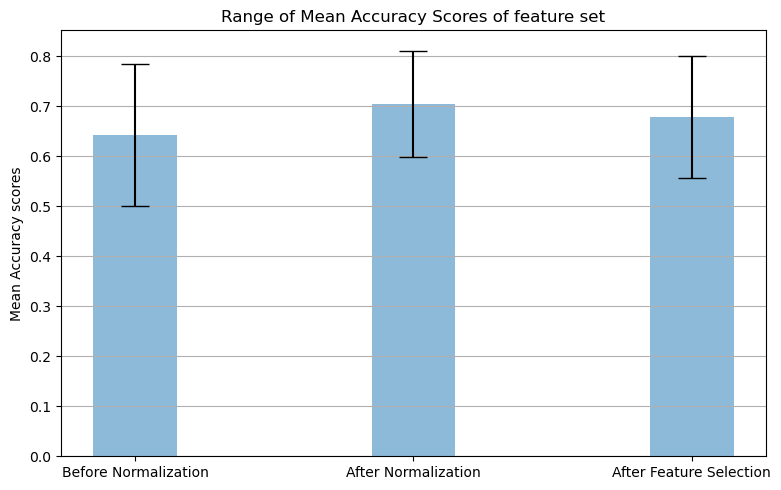

In [31]:
from matplotlib import pyplot as plt
import numpy as np

bn_features = [0.7420, 0.5436, 0.4789, 0.7494, 0.8437, 0.4935]
an_features = [0.7834, 0.6518, 0.7461, 0.7598, 0.8421, 0.4937, 0.6532]
af_features = [0.7896, 0.4993, 0.7223, 0.7404, 0.8319, 0.5043, 0.6583]

bn_features_mean = np.mean(bn_features)
an_features_mean = np.mean(an_features)
af_features_mean = np.mean(af_features)

bn_features_std = np.std(bn_features)
an_features_std = np.std(an_features)
af_features_std = np.std(af_features)

labels = ['Before Normalization', 'After Normalization', 'After Feature Selection']
x_pos = np.arange(len(labels))
mean_accuracies = [bn_features_mean, an_features_mean, af_features_mean]
error = [bn_features_std, an_features_std, af_features_std]

fig, ax = plt.subplots(figsize=(8, 5))  # Adjusted the width of the figure
bar_width = 0.3  # Adjusted the width of the bars

ax.bar(x_pos, mean_accuracies, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=bar_width)
ax.set_ylabel('Mean Accuracy scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Range of Mean Accuracy Scores of feature set')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()
